# 1. Cross Correlation

### 1 a)

In [1]:
import cv2
import numpy as np

In [2]:
def NCC(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    Matrix = [[0 for x in range(iH-kH+1)] for y in range(iW-kW+1)]
    for j in range(0,iH-kH+1):
        for i in range(0,iW-kW+1):
            image_section = image[j:j+kH,i:i+kW].copy()
            image_section = normalize(image_section)
            Matrix[i][j] = sum(sum(np.multiply(image_section,kernel)))
    return Matrix

In [3]:
def normalize(sec):
    return ((sec-np.mean(sec))/(np.std(sec)+0.00001))

In [4]:
img = cv2.imread('u2cuba.jpg',0)
temp = cv2.imread('trailer.png',0)

In [5]:
M = NCC(img,temp)

In [6]:
M = normalize (M)

In [7]:
x = ( (M - M.min()) / (M.max() - M.min()) ) * (255 - 0) + 0

In [8]:
cv2.imwrite("1a.png",x)

True

### 1 b)

The template has a kinda figure of three parellel diagonal stripes and the image (1a.png) i.e my putput has a region with one long diagonal stripe. There is no region with 3 parellel diagonal stripes, so this is the best match that we could find, hence the peak. Only one of them matches because of the orientation of the stripe.

### 1 c)

In [9]:
temp2 = cv2.imread('trailerSlightlyBigger.png',0)
N = NCC(img,temp2)
N = normalize (N)
y = ( (N - N.min()) / (N.max() - N.min()) ) * (255 - 0) + 0

In [11]:
cv2.imwrite("1c.png",y)

True

The output with the bigger template is less constrast. It is a lot more unclear too. The reason is, the larger template has a lot of white patches, thus giving higher output.

Thus, a small black region as the earlier template will end up as black in the small template but slightly white in the larger template.

One disadvanage of this method in real world images is that we don't know the size of template that works the best.



### 1d)

We will have Nr X Ns templates with each searching **(n-m) X (n-m)** image patches. Each patch takes less than m^2 operations. Hence the time complexity will be  **O( (n-m)^2 X m^2 X Nr X Ns )**.

If the smaller template is a subset of the bigger template, we could do just 1 correlation using the bigger template and then query the stored values for the smaller template. This would have a time complexity of:         **O(m^2 X n^2 X N_R)**.


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

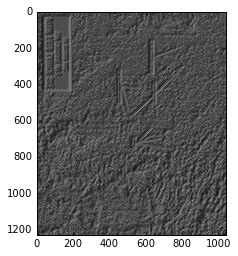

In [13]:
plt.imshow(x,cmap='gray')

### Above is the 1 a) output

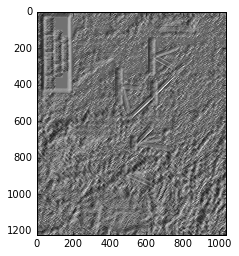

In [14]:
plt.imshow(y,cmap='gray')

### Above is the 1 c) output